# Gabor filters

In [1]:
# Torch related imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Data visualisation and numerical computing
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, ConnectionPatch
import numpy as np
import math

# Additional useful imports
import pandas as pd  
import seaborn as sns  
import os  
import sys  
import logging  

import torchvision.transforms as transforms
from torchvision.transforms import functional as TF
from torch.distributions.multivariate_normal import MultivariateNormal
from PIL import Image
from torchvision import transforms
from PIL import Image

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Define a transform to convert images to PyTorch tensors
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert image to grayscale
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalise to [-1, 1] range
])

# Load image using PIL
image_path = 'test_image1.png'
image = Image.open(image_path)

# Apply the transform to the image
image_tensor = transform(image)

In [3]:
def build_gabor_kernel(ksize, sigma, theta, lambd, gamma, psi):
    """Create a Gabor kernel with specified parameters."""
    x_grid = np.linspace(-ksize // 2, ksize // 2, ksize)
    y_grid = np.linspace(-ksize // 2, ksize // 2, ksize)
    x, y = np.meshgrid(x_grid, y_grid)
    rotx = x * np.cos(theta) + y * np.sin(theta)
    roty = -x * np.sin(theta) + y * np.cos(theta)
    g = np.exp(-0.5 * (rotx**2 + gamma**2 * roty**2) / sigma**2) * np.cos(2 * np.pi * rotx / lambd + psi)
    return torch.tensor(g, dtype=torch.float32)

def apply_gabor_filter(image_tensor, kernel):
    """Apply Gabor filter to the image tensor."""
    kernel_tensor = kernel.unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions
    filtered = F.conv2d(image_tensor.unsqueeze(0), kernel_tensor, padding=ksize // 2)
    return filtered[0, 0]


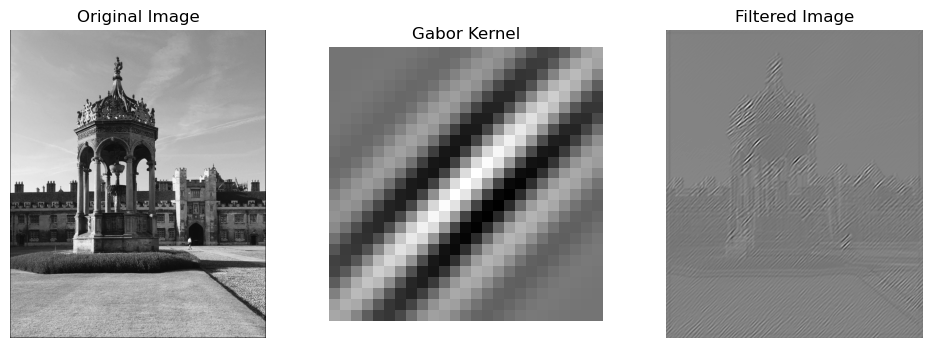

In [15]:
# Define the Gabor kernel parameters
ksize = 25 # Size of the kernel
sigma = 5   # Standard deviation of the Gaussian function
theta = np.pi / 4  # Orientation
lambd = 7  # Wavelength
gamma = 0.4 # Spatial aspect ratio
psi = 0.6     # Phase offset

# Generate Gabor kernel
gabor_kernel = build_gabor_kernel(ksize, sigma, theta, lambd, gamma, psi)

# Apply Gabor filter
filtered_image = apply_gabor_filter(image_tensor, gabor_kernel)

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image_tensor[0], cmap='gray')
plt.axis("off")
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(gabor_kernel, cmap='gray')
plt.axis("off")
plt.title('Gabor Kernel')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.axis("off")
plt.title('Filtered Image')

plt.savefig("Gabor1")
plt.show()

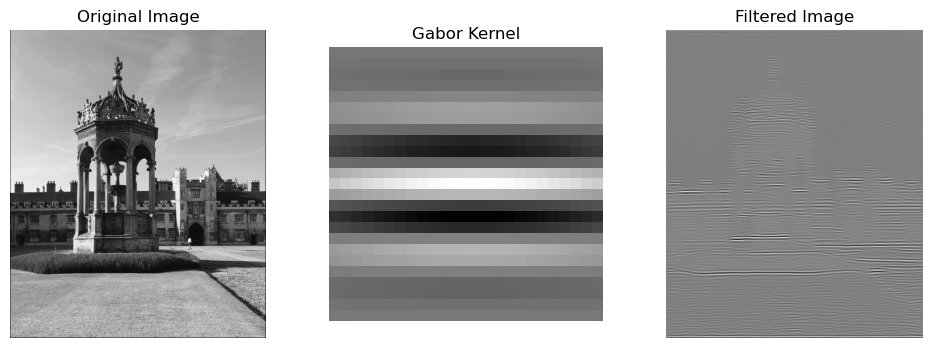

In [16]:
# Define the Gabor kernel parameters
ksize = 25  # Size of the kernel
sigma = 5   # Standard deviation of the Gaussian function
theta = np.pi / 2  # Orientation
lambd = 7  # Wavelength
gamma = 0.4 # Spatial aspect ratio
psi = 0.6     # Phase offset

# Generate Gabor kernel
gabor_kernel = build_gabor_kernel(ksize, sigma, theta, lambd, gamma, psi)

# Apply Gabor filter
filtered_image = apply_gabor_filter(image_tensor, gabor_kernel)

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image_tensor[0], cmap='gray')
plt.axis("off")
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(gabor_kernel, cmap='gray')
plt.axis("off")
plt.title('Gabor Kernel')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.axis("off")
plt.title('Filtered Image')

plt.savefig("Gabor2")
plt.show()

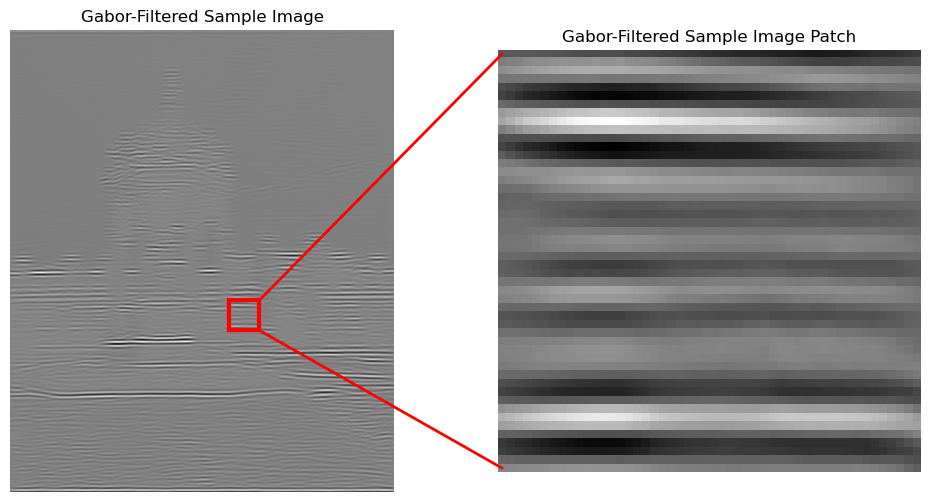

In [74]:
# Define coordinates for the zoomed-in area
zoom_start_x = 365
zoom_start_y = 450
zoom_size = 50  # Size of the zoomed area

# Zoom in on a 50x50 grid of the filtered image
zoomed_area = filtered_image[zoom_start_y:zoom_start_y + zoom_size, zoom_start_x:zoom_start_x + zoom_size]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

# Plot the full-sized image with a square indicating the zoomed area on the left
ax1.imshow(filtered_image, cmap='gray')
ax1.set_title("Gabor-Filtered Sample Image")
rect = Rectangle((zoom_start_x, zoom_start_y), zoom_size, zoom_size, linewidth=3, edgecolor='r', facecolor='none')
ax1.add_patch(rect)
ax1.axis('off')

# Plot the zoomed-in area on the right
ax2.imshow(zoomed_area, cmap='gray')
ax2.set_title("Gabor-Filtered Sample Image Patch")
ax2.axis('off')

# Drawing red lines connecting the square to the zoomed-in area
con1 = ConnectionPatch(xyA=(zoom_start_x+zoom_size, zoom_start_y), xyB=(0, 0), coordsA='data', coordsB='data',
                       axesA=ax1, axesB=ax2, color='red', lw=2)
ax2.add_artist(con1)

con2 = ConnectionPatch(xyA=(zoom_start_x + zoom_size, zoom_start_y + zoom_size), xyB=(0, 49), coordsA='data', coordsB='data',
                       axesA=ax1, axesB=ax2, color='red', lw=2)
ax2.add_artist(con2)

plt.show()


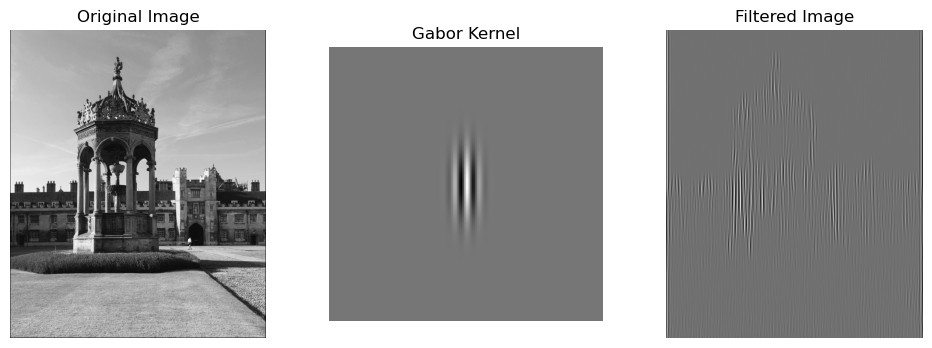

In [8]:
# Define the Gabor kernel parameters
ksize = 150  # Size of the kernel
sigma = 5   # Standard deviation of the Gaussian function
theta = np.pi  # Orientation
lambd = 7  # Wavelength
gamma = 0.4 # Spatial aspect ratio
psi = 0.6     # Phase offset

# Generate Gabor kernel
gabor_kernel = build_gabor_kernel(ksize, sigma, theta, lambd, gamma, psi)

# Apply Gabor filter
filtered_image = apply_gabor_filter(image_tensor, gabor_kernel)

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image_tensor[0], cmap='gray')
plt.axis("off")
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(gabor_kernel, cmap='gray')
plt.axis("off")
plt.title('Gabor Kernel')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.axis("off")
plt.title('Filtered Image')

plt.savefig("Gabor2")
plt.show()